In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

In [3]:
# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

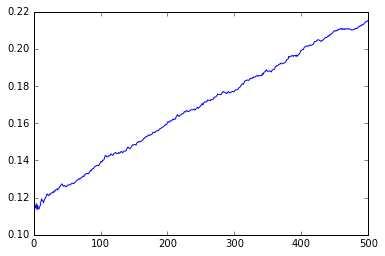

In [9]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 20, 9), loss='sigmoid', maxIter=500, 
                   batchSize=100, learningRate=1.0, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=100)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc)
plt.show()

In [ ]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 20, 9), loss='tanh', maxIter=500, 
                   batchSize=100, learningRate=1.0, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=100)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc)
plt.show()

In [ ]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 20, 9), loss='relu', maxIter=500, 
                   batchSize=100, learningRate=1.0, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=100)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc)
plt.show()

### Long time running

In [ ]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 20, 9), loss='sigmoid', maxIter=10000, 
                   batchSize=100, learningRate=1.0, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=5000)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc)
plt.show()